In [80]:
import pandas as pd
import numpy as np
import seaborn  as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv'
term = pd.read_csv(url).drop(['ID'], axis=1)

In [3]:
term

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
x = term.drop(['subscribed'], axis=1)
y = term['subscribed']

In [5]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure


In [33]:
cate = [i for i in term.columns if term[i].dtype =='object' and i != 'subscribed']
categorical = x[cate].astype(str)
categorical

,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,unknown,no,no,no,telephone,nov,unknown
1,unknown,married,secondary,no,no,no,cellular,jul,unknown
2,services,married,secondary,no,yes,no,cellular,jul,unknown
3,management,divorced,tertiary,no,no,no,cellular,jun,success
4,technician,married,secondary,no,yes,no,cellular,feb,unknown
...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown
31644,management,single,tertiary,no,no,no,cellular,aug,unknown
31645,technician,married,secondary,no,yes,no,telephone,may,failure


In [34]:
ohe = OneHotEncoder(drop='first')

In [35]:
x_transformed = ohe.fit_transform(categorical).toarray()

In [36]:
x_transformed1 = pd.DataFrame(x_transformed)
x_transformed1

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31643,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
num = [i for i in term.columns if term[i].dtype != 'object']
numerical = term[num]
Numerical = pd.DataFrame(numerical)
Numerical

,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...
31642,29,0,12,116,2,-1,0
31643,53,380,5,438,2,-1,0
31644,32,312,7,37,3,-1,0
31645,57,225,15,22,7,337,12


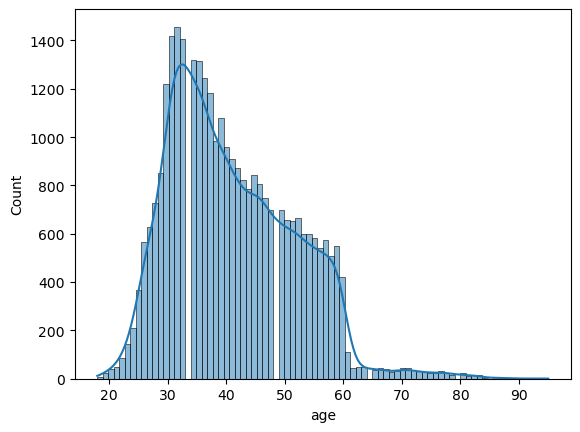

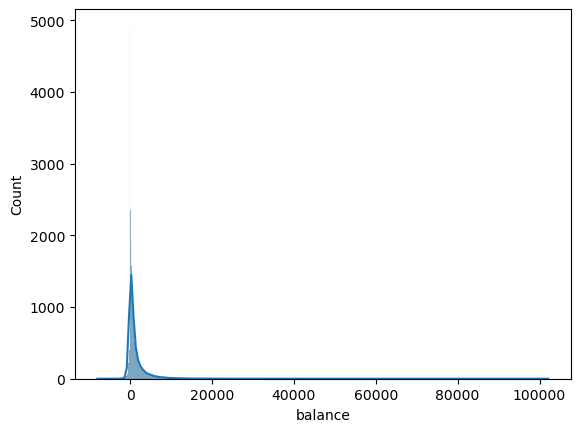

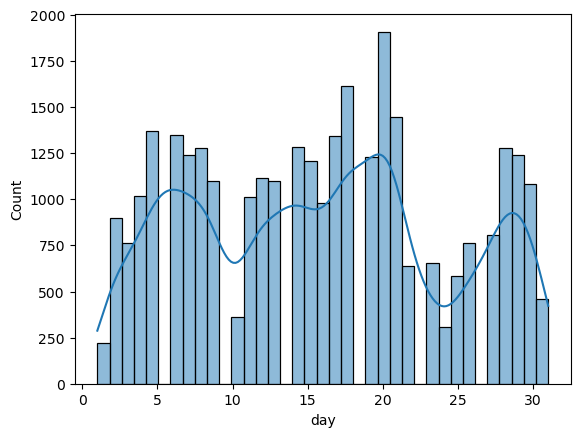

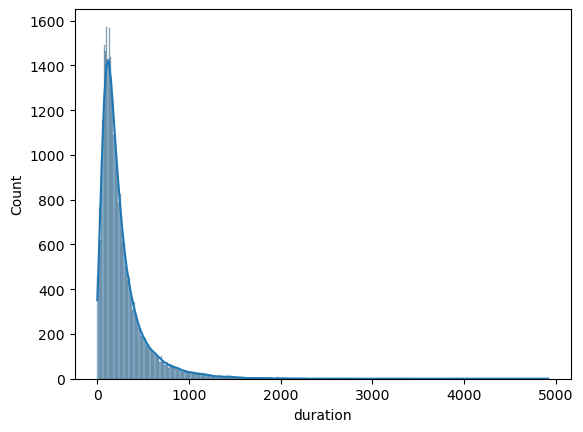

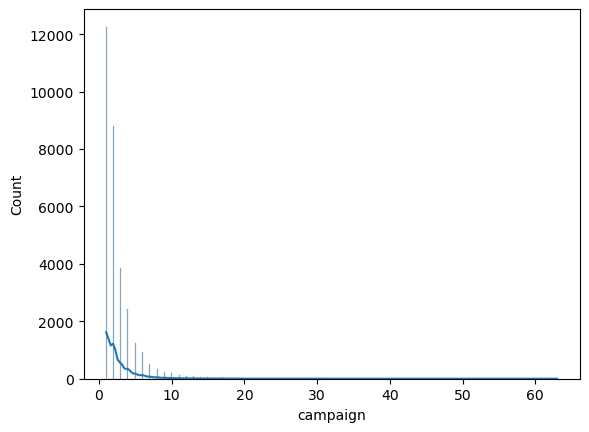

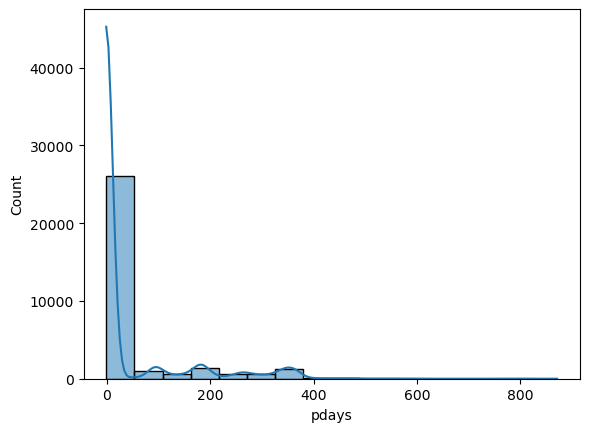

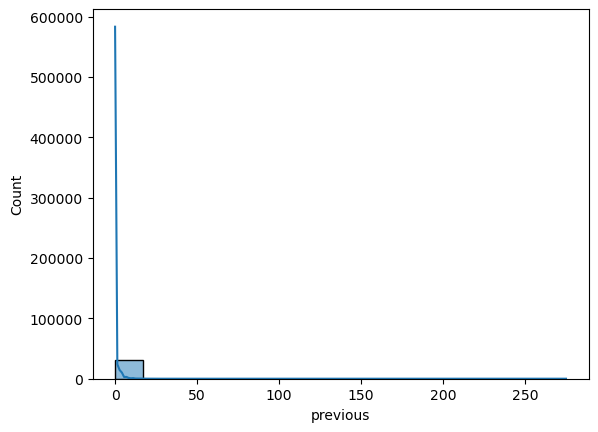

In [59]:
for i in Numerical.columns:
    sns.histplot(data=Numerical, x=i, kde=True)
    plt.show()

In [60]:
from sklearn.preprocessing import PowerTransformer

In [61]:
pt = PowerTransformer()
Numerical1 = pt.fit_transform(Numerical)

In [83]:
Numerical2 = pd.DataFrame(Numerical1, columns = [35,36,37,38,39,40,41])
Numerical2

,35,36,37,38,39,40,41
0,1.341382,0.340062,0.439464,-1.443825,0.135025,-0.469696,-0.469673
1,-0.966378,-0.432502,0.548516,-0.751296,0.135025,-0.469696,-0.469673
2,-1.538153,-0.031475,0.328737,0.290005,-1.109239,-0.469696,-0.469673
3,1.406955,0.776856,0.762001,1.895948,-1.109239,2.105039,2.177812
4,-0.966378,-0.361739,-1.515370,0.833299,-1.109239,-0.469696,-0.469673
...,...,...,...,...,...,...,...
31642,-1.240871,-0.435463,-0.378514,-0.503544,0.135025,-0.469696,-0.469673
31643,1.136104,-0.238544,-1.352488,1.008101,0.135025,-0.469696,-0.469673
31644,-0.836711,-0.268747,-1.049546,-1.598288,0.738582,-0.469696,-0.469673
31645,1.406955,-0.308996,-0.014725,-2.037314,1.609201,2.150844,2.186083


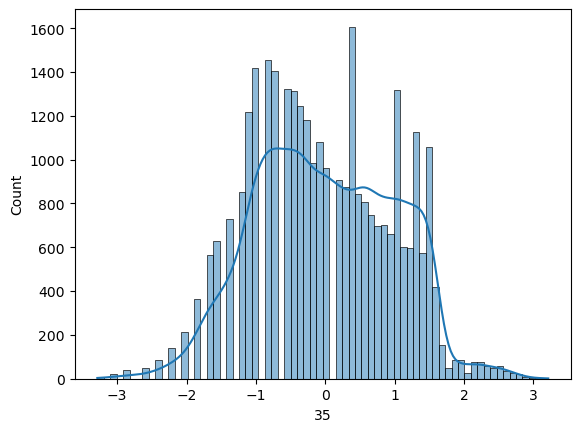

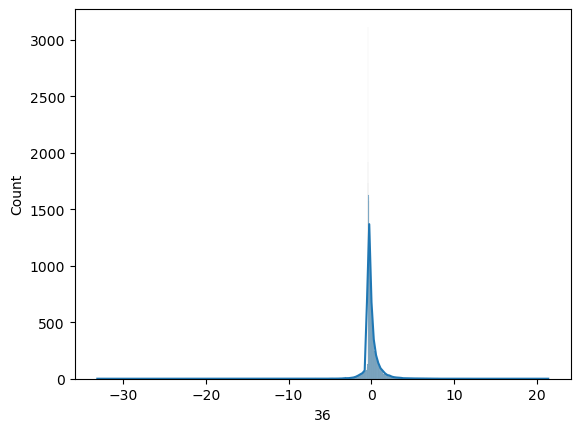

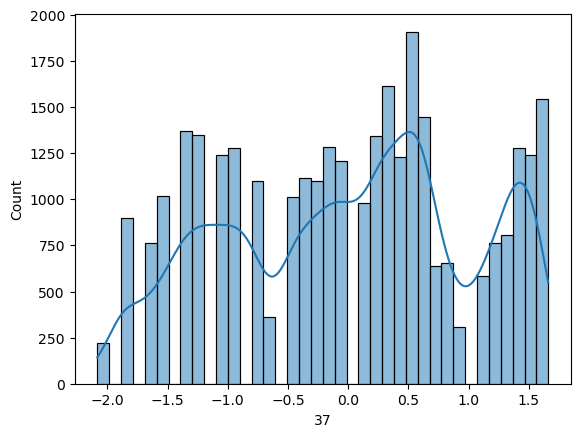

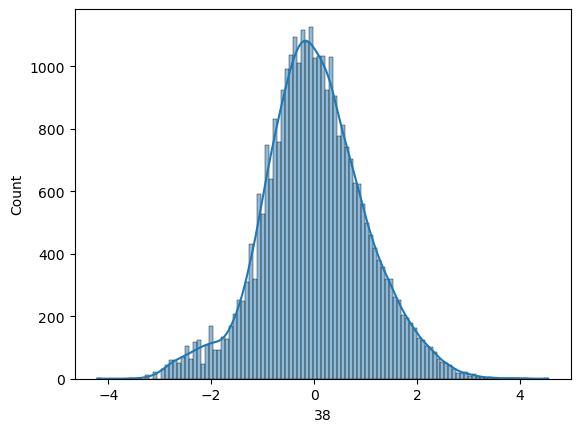

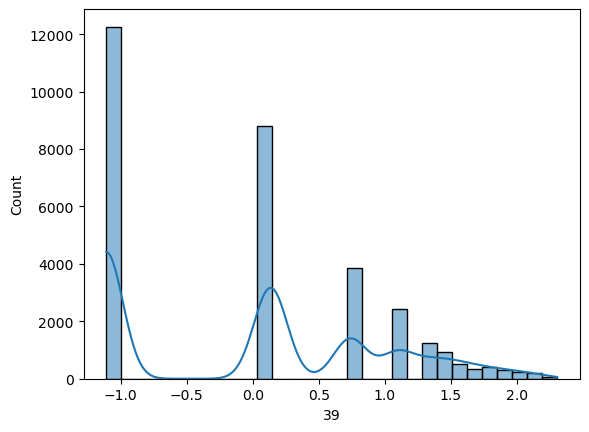

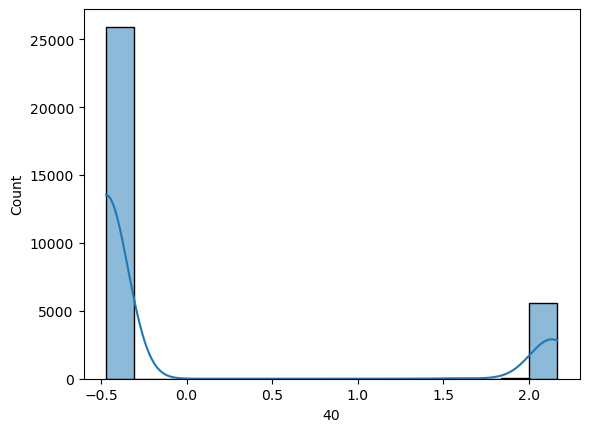

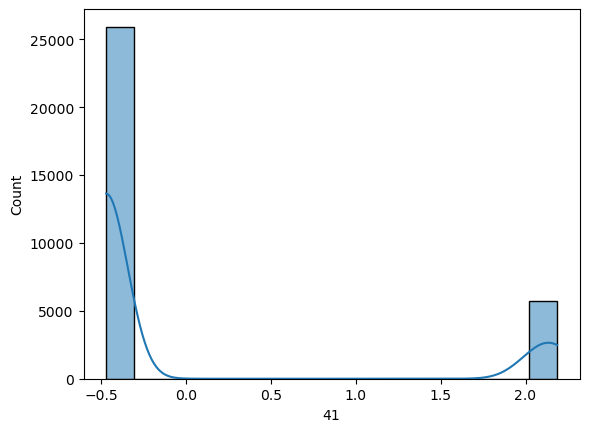

In [84]:
for i in Numerical2.columns:
    sns.histplot(data=Numerical2, x=i, kde=True)
    plt.show()

In [72]:
X = pd.merge(x_transformed1, Numerical2, left_index =True, right_index=True)

In [73]:
X

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.341382,0.340062,0.439464,-1.443825,0.135025,-0.469696,-0.469673
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.966378,-0.432502,0.548516,-0.751296,0.135025,-0.469696,-0.469673
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.538153,-0.031475,0.328737,0.290005,-1.109239,-0.469696,-0.469673
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.406955,0.776856,0.762001,1.895948,-1.109239,2.105039,2.177812
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.966378,-0.361739,-1.515370,0.833299,-1.109239,-0.469696,-0.469673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.240871,-0.435463,-0.378514,-0.503544,0.135025,-0.469696,-0.469673
31643,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.136104,-0.238544,-1.352488,1.008101,0.135025,-0.469696,-0.469673
31644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.836711,-0.268747,-1.049546,-1.598288,0.738582,-0.469696,-0.469673
31645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.406955,-0.308996,-0.014725,-2.037314,1.609201,2.150844,2.186083


In [74]:
Y = term['subscribed']

In [111]:
le = LabelEncoder()
y = le.fit_transform(Y)
y1 = pd.DataFrame(y)

# Logistic Regression

In [115]:
lr = LogisticRegression()
lr.fit(X, y)

C:\Users\NIRANKARI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
y_pred_train = lr.predict(x)

In [117]:
score = accuracy_score(y_pred_train, y)*100
score

90.25500047397857

In [118]:
y_pred_train.shape

(31647,)

In [119]:
y.shape

(31647,)

In [120]:
score1 = confusion_matrix(y_pred_train, y)
score1

array([[27229,  2381],
       [  703,  1334]], dtype=int64)

# test 

In [86]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv'
term1 = pd.read_csv(url).drop(['ID'], axis=1)

In [87]:
term1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [92]:
cate = [i for i in term1.columns if term1[i].dtype =='object']
categorical1 = term1[cate]
categorical1 

,job,marital,education,default,housing,loan,contact,month,poutcome
0,services,married,secondary,no,yes,no,cellular,may,unknown
1,retired,divorced,primary,no,no,no,telephone,jul,unknown
2,self-employed,single,tertiary,no,yes,no,unknown,may,unknown
3,services,single,primary,no,yes,no,telephone,may,unknown
4,blue-collar,divorced,secondary,no,no,yes,unknown,jul,unknown
...,...,...,...,...,...,...,...,...,...
13559,management,married,tertiary,no,no,no,cellular,aug,unknown
13560,blue-collar,married,primary,no,yes,no,unknown,jun,unknown
13561,retired,married,primary,no,yes,no,cellular,jan,unknown
13562,admin.,single,secondary,no,no,no,cellular,nov,success


In [93]:
x_transformed1 = ohe.fit_transform(categorical1).toarray()

In [94]:
x_transformed2 = pd.DataFrame(x_transformed1)
x_transformed2

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13561,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [95]:
num = [i for i in term1.columns if term1[i].dtype !='object']
numerical = term1[num]
numerical

,age,balance,day,duration,campaign,pdays,previous
0,32,118,15,20,6,-1,0
1,78,2787,1,372,1,-1,0
2,31,144,16,676,1,-1,0
3,57,3777,13,65,2,-1,0
4,45,-705,3,111,1,-1,0
...,...,...,...,...,...,...,...
13559,39,45,28,148,4,-1,0
13560,54,2281,20,158,1,-1,0
13561,35,285,29,136,1,-1,0
13562,29,464,9,208,2,91,3


In [103]:
pt = PowerTransformer()
Numerical3 = pt.fit_transform(numerical)

In [104]:
Numerical4 = pd.DataFrame(Numerical3, columns=[35,36,37,38,39,40,41])
Numerical4

,35,36,37,38,39,40,41
0,-0.830543,-0.349877,-0.001693,-2.060474,1.484674,-0.479134,-0.479073
1,2.549644,0.636076,-2.093781,0.802165,-1.105760,-0.479134,-0.479073
2,-0.959923,-0.335968,0.115298,1.555360,-1.105760,-0.479134,-0.479073
3,1.414890,0.940270,-0.242825,-1.058210,0.133392,-0.479134,-0.479073
4,0.520126,-2.747632,-1.691501,-0.537642,-1.105760,-0.479134,-0.479073
...,...,...,...,...,...,...,...
13559,-0.038159,-0.392516,1.386449,-0.240061,1.089247,-0.479134,-0.479073
13560,1.213253,0.473571,0.563344,-0.170648,-1.105760,-0.479134,-0.479073
13561,-0.468654,-0.266423,1.483967,-0.328846,-1.105760,-0.479134,-0.479073
13562,-1.233677,-0.186352,-0.760845,0.128628,0.133392,2.063262,2.141219


In [105]:
X1 = pd.merge(x_transformed2, Numerical4, left_index =True, right_index=True)

In [106]:
X1

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.830543,-0.349877,-0.001693,-2.060474,1.484674,-0.479134,-0.479073
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.549644,0.636076,-2.093781,0.802165,-1.105760,-0.479134,-0.479073
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.959923,-0.335968,0.115298,1.555360,-1.105760,-0.479134,-0.479073
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.414890,0.940270,-0.242825,-1.058210,0.133392,-0.479134,-0.479073
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.520126,-2.747632,-1.691501,-0.537642,-1.105760,-0.479134,-0.479073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.038159,-0.392516,1.386449,-0.240061,1.089247,-0.479134,-0.479073
13560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.213253,0.473571,0.563344,-0.170648,-1.105760,-0.479134,-0.479073
13561,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.468654,-0.266423,1.483967,-0.328846,-1.105760,-0.479134,-0.479073
13562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.233677,-0.186352,-0.760845,0.128628,0.133392,2.063262,2.141219


In [114]:
y_pred_test = lr.predict(X1)

# Random forest classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rand = RandomForestClassifier()

In [124]:
rand.fit(X, y)

RandomForestClassifier()

In [125]:
Y_train_pre = rand.predict(X)

In [126]:
score = accuracy_score(Y_train_pre, y)
score

1.0

In [127]:
score1 = confusion_matrix(Y_train_pre, y)
score1

array([[27932,     0],
       [    0,  3715]], dtype=int64)

# test

In [128]:
Y_test_pre = rand.predict(X1)

In [129]:
Y_test_pre

array([0, 0, 0, ..., 0, 1, 0])